# 주성분 분석 (PCA : Principal Component Analysis)

- 다차원의 데이터를 소차원의 데이터로 환원시키는 기법

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [5]:
# 2차원 배열로 변경하기
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

## PCA 모델 구성하기
---

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 300개의 데이터 중 구별이 확실한 주성분 50개 선택(feature 들 중 특징을 포함하여 구성)
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 갯수
    
    # 한 줄에 10개씩 이미지 그리기. 샘플 갯수를 10으로 나누어 전체 행갯수를 계산
    rows = int(np.ceil(n/10)) # rows가 실수가 나오면 안되기에 올림 처리하기
    
    # 행이 1개이면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개
    cols = n if rows<2 else 10
    # squeeze
    fig, axs = plt. subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지만 그린다.
                axs[i,j].imshow(arr[i*10+j], cmap="gray_r")
            axs[i,j].axis('off')
    plt.show()

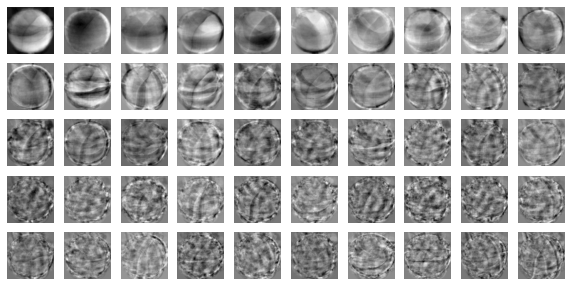

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
    # 컬럼을 50개로 하고 샘플이 300개로
print(fruits_2d.shape) # 원본 크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)


(300, 10000)
(300, 50)


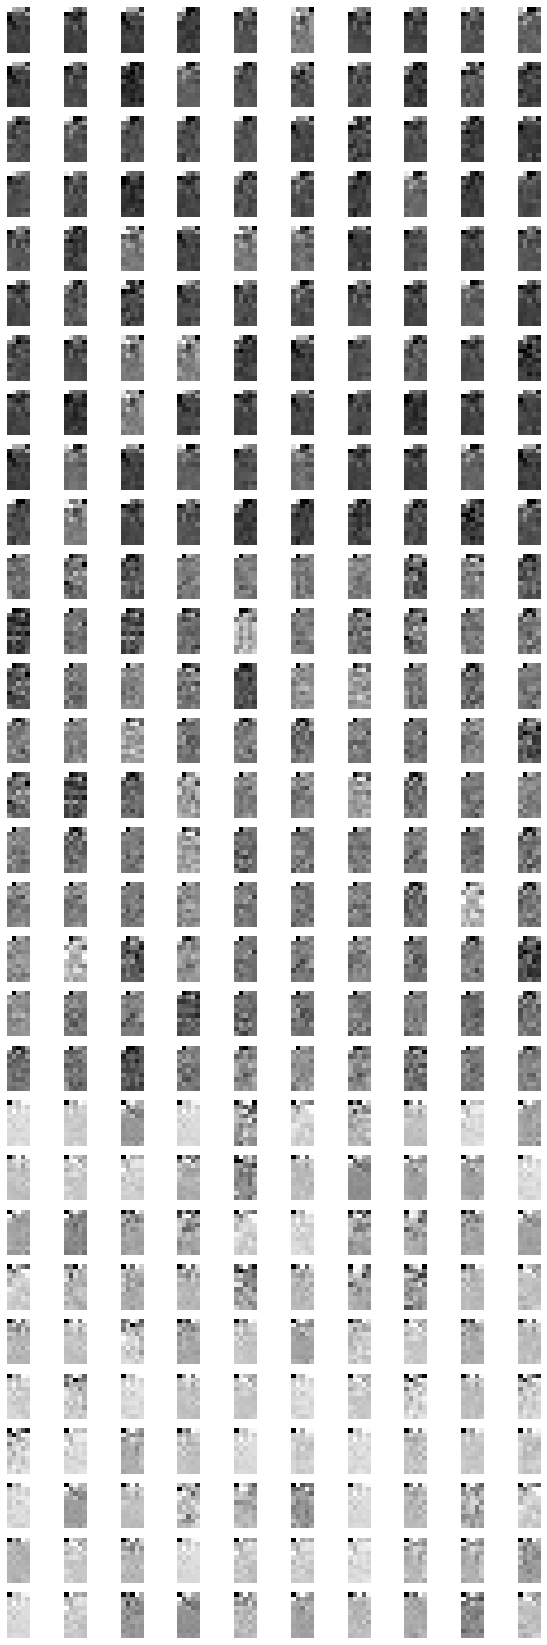

In [12]:
# (300, 50)에서 50을 10 * 5로 특징만 잡아오는 것
draw_fruits(fruits_pca.reshape(-1, 10, 5))

> 이미지를 가지고 특징들만 뽑아낸 것이다. (DL에서는 CNN)

---
## 원본 데이터 재구성

In [16]:
# encoding 한 것을 다시 decoding하는 것
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [17]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

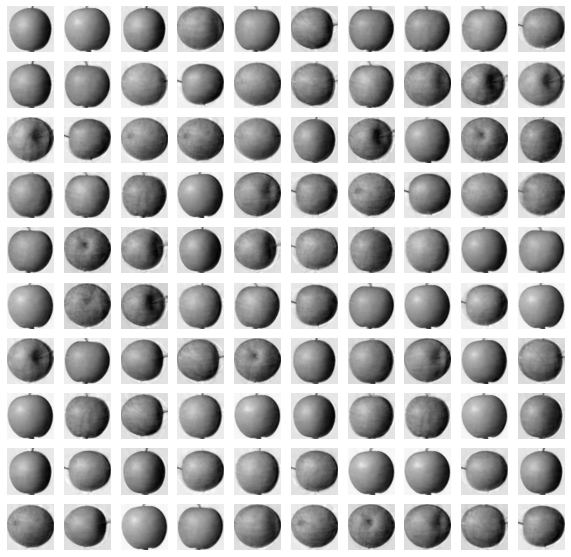

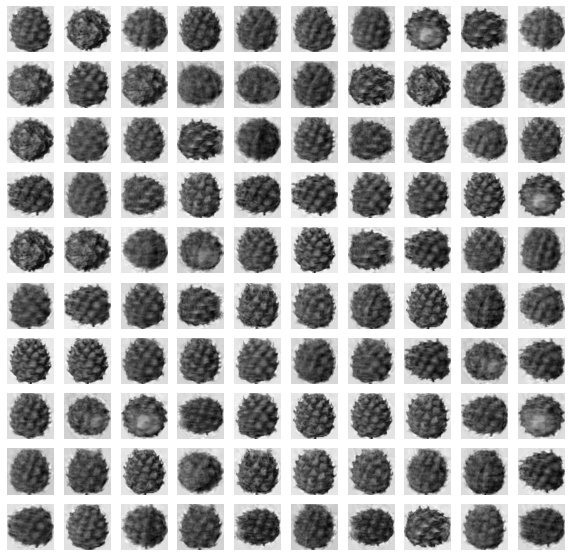

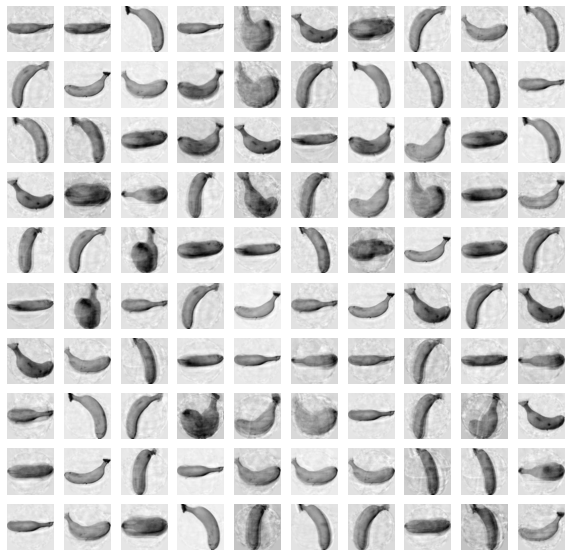

In [18]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

> 1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗히지 않으나 물체의 구분은 가능하다.

---
## 설명된 분산
: 주성분으로 구성할때 원본 데이털르 분산을 어느정도 유지하고 있는지 확인하는 방법

In [22]:
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터

0.9223035808027811

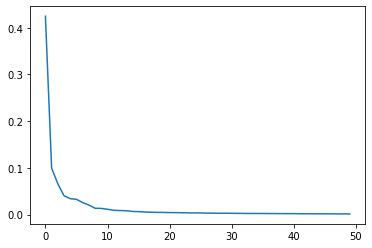

In [23]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 그래프를 보니 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다.

---
## 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
# 로지스틱은 지도학습 -> target이 필요
target = np.array([0]*100+[1]*100+[2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.56961894, 0.44416618, 0.3829    , 0.36732721, 2.56656194]),
 'score_time': array([0.00201917, 0.00222278, 0.00421095, 0.0016191 , 0.00171518]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [40]:
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.8661148548126221


> 정확도는 99.7% 정도이며, 계산에 필요한 시간은 0.8초 정도 나왔다.

In [42]:
# 300 * 50로 구성된 주성분 분석으로 구성된 데이터로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03554549217224121


> 정확도는 100% 정도이며 계산에 필요한 시간은 0.03초이다.

In [44]:
scores

{'fit_time': array([0.04601908, 0.04226899, 0.02225041, 0.02683496, 0.04035401]),
 'score_time': array([0.00075293, 0.00029683, 0.00029063, 0.00032783, 0.00028896]),
 'test_score': array([1., 1., 1., 1., 1.])}

---
## 주성분 분석의 분산의 크기를 정해 사용하기


In [46]:
# n_components를 실수로 정하면 분산의 percentage 정도로 나타낸다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [48]:
# feature가 2개면 맞출 수 있다.
print(pca.n_components_)

2


> 필요한 주성분 Feature를 2개로 사용  
> 주성분 2개면 그래프로 표현이 가능하다. 

In [50]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [51]:
# 교차 검증으로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03699965476989746


> 정확도는 99.3% 이며 계산시간은 0.04초이다.

In [55]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)
pcaComponents

# 데이터 프레임 구성
import pandas as pd
pcaDf = pd.DataFrame(data=pcaComponents, columns=['PCA1','PCA2'])
pcaDf.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
## k-Means에서 주성분 분석 적용해보기

In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [58]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

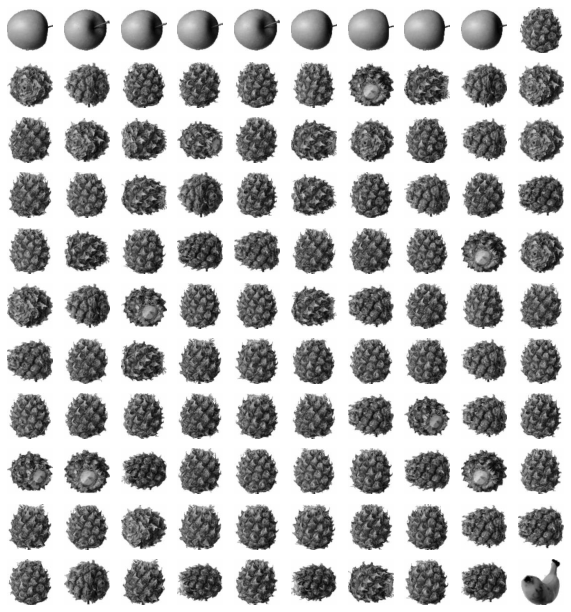

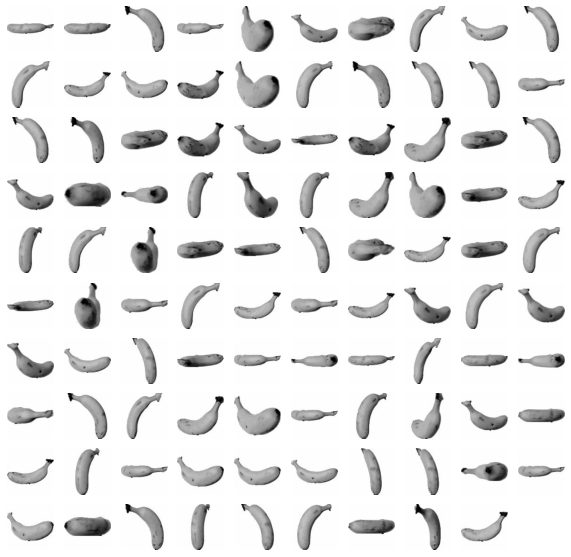

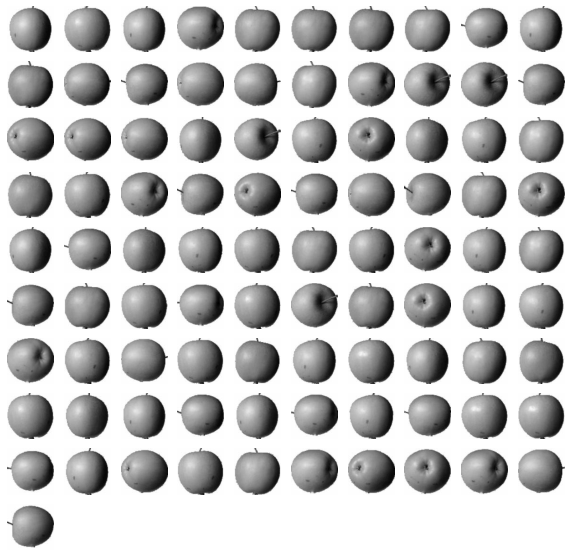

In [61]:
# 그림으로 확인하기
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

---
## 산포도로 확인해보기

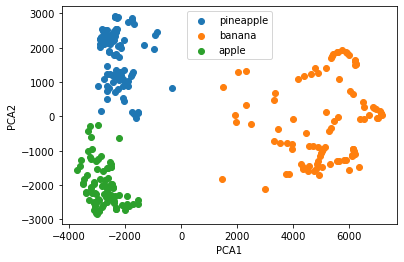

In [63]:
for label in range(0, 3):
    data = fruits_pca[km.labels_== label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()